# Project Introduction
The purpose of this project is to equip the company with the necessary insights to successfully enter the aviation industry by identifying aircraft options that pose the lowest risk. As we diversify our portfolio through the purchase and operation of airplanes for commercial and private enterprises, understanding the associated risks is crucial for informed decision-making.

This project involves a thorough analysis of various aircrafts, focusing on critical risk factors such as safety performance, maintenance costs, operational efficiency, and market viability. By employing data cleaning, imputation, analysis, and visualization techniques, I will transform complex data into clear, actionable insights. These insights will enable the stakeholders to make strategic decisions that minimize risk while maximizing potential returns

## 1.Data Understanding and Cleaning
#### Load the Data
Start by loading the data using using relevant tools so as to provide accurate visualisations and info for analysis.

In [4]:
#import necessary tools to access the data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_original = pd.read_csv("Aviation_Data.csv", encoding='latin1', low_memory=False)
# Creating a copy of the original data before manipulation
df = df_original.copy()
df.shape

(90348, 31)

In [6]:
# Display the first few rows
print(df.head())

         Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   
3  20001218X45448           Accident      LAX96LA321  1977-06-19   
4  20041105X01764           Accident      CHI79FA064  1979-08-02   

          Location        Country   Latitude   Longitude Airport.Code  \
0  MOOSE CREEK, ID  United States        NaN         NaN          NaN   
1   BRIDGEPORT, CA  United States        NaN         NaN          NaN   
2    Saltville, VA  United States  36.922223  -81.878056          NaN   
3       EUREKA, CA  United States        NaN         NaN          NaN   
4       Canton, OH  United States        NaN         NaN          NaN   

  Airport.Name  ... Purpose.of.flight Air.carrier Total.Fatal.Injuries  \
0          NaN  ...          Personal         NaN                  2.0   
1   

#### Data cleaning and checking for missing values, data types, and general statistics.

In [8]:
# Summary statistics
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [9]:
# Get info about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [10]:
# Check for missing values
print(df.isnull().sum())

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40216
Airport.Name              37644
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2841
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8555
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7843
Publication.Date          16689
dtype: i

In [11]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [19]:
# Fill missing numerical values with the median
df['Total.Fatal.Injuries'].fillna(df['Total.Fatal.Injuries'].median(), inplace=True)
df['Total.Serious.Injuries'].fillna(df['Total.Serious.Injuries'].median(), inplace=True)

# Fill missing categorical values with the mode
df['Injury.Severity'].fillna(df['Injury.Severity'].mode()[0], inplace=True)
df['Aircraft.damage'].fillna('Unknown', inplace=True)
df['Make'].fillna('Unknown', inplace=True)
df['Engine.Type'].fillna('Unknown', inplace=True)

# Verify missing values are handled
print(df.isnull().sum())


Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40216
Airport.Name              37644
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category         58061
Registration.Number        2841
Make                          0
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                   0
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7843
Publication.Date          16689
dtype: i

C:\Users\admin\AppData\Local\Temp\ipykernel_25604\1489239270.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total.Fatal.Injuries'].fillna(df['Total.Fatal.Injuries'].median(), inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_25604\1489239270.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

#### Saving the cleaned extract of the DataFrame

In [24]:
#Save the cleaned DataFrame to a CSV file without including index
df.to_csv('cleaned_Aviation_Data.csv', index=False)

#Display a message indicating the clean file has been saved
print("Cleaned data has been saved to 'cleaned_Aviation_Data.csv'.")

Cleaned data has been saved to 'cleaned_Aviation_Data.csv'.


## 2.Data Visualisation

In this part, different data visualisations will be used to communicate across the purpose of this project.To analyze operational efficiency, safety performance, and risk analysis, different columns can be relevant based on what each metric requires but first we need to load the cleaned file for better and more accurate results

##### 1. Operational Efficiency:
Operational efficiency refers to how well aircraft are utilized, including factors like fuel consumption, flight schedules, engine type, and aircraft performance.

In [29]:
# load the cleaned data from the csv file
df_cleaned = pd.read_csv('cleaned_Aviation_Data.csv')
df_cleaned

C:\Users\admin\AppData\Local\Temp\ipykernel_25604\806172473.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cleaned = pd.read_csv('cleaned_Aviation_Data.csv')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,0.0,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


##### * Horizontal Plot of Operational Efficiency by Engine Type

This plot shows the **distribution of aircrafs by Engine Type**, providing insight into how operational efficiency may vary based on the type of engine used in different aircraft. The count of aircraft for each engine type is displayed on the horizontal axis, making it easier to compare across categories.


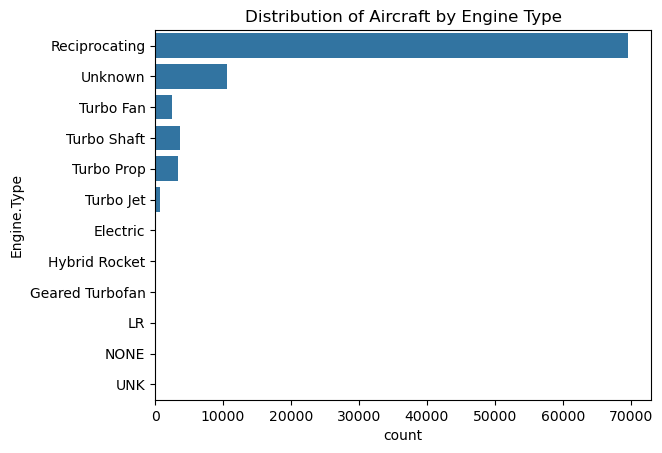

In [64]:
# Horizontal plot of operational efficiency by Engine.Type
sns.countplot(data=df_cleaned, y='Engine.Type')
plt.title('Distribution of Aircraft by Engine Type')
plt.show()


##### * Visualization of Number of Engines

This bar plot provides a visual representation of the **count of aircraft by the number of engines**. It helps in understanding the operational efficiency across different aircraft configurations, highlighting how many engines are typically present in the aircraft in the dataset.


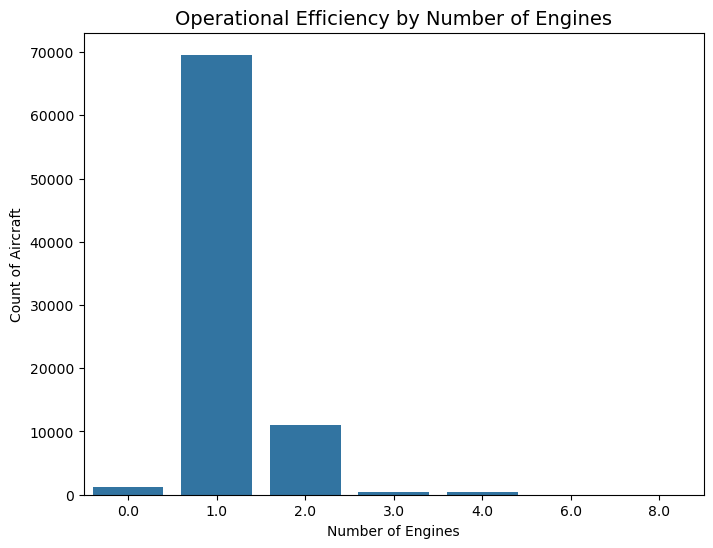

In [33]:
# Visualisation of number of engines 
# Bar plot showing the count of aircraft by Number of Engines
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, x='Number.of.Engines')
plt.title('Operational Efficiency by Number of Engines', fontsize=14)
plt.xlabel('Number of Engines')
plt.ylabel('Count of Aircraft')
plt.show()

**Results Explanation**

*Engine Type Distribution:* The plot shows the number of aircraft for each engine type (such as turbofan engines, or turbojet engines). Since reciprocating engines has the highest count. Then it might correlate with certain advantages like cost-effectiveness, reliability, or operational efficiency.

*Operational Efficiency Insight:* If an engine type has a high count, it may indicate that this type is widely used, possibly because it offers better fuel efficiency, lower maintenance costs, or other operational advantages. 

*Operational Preferences:* By examining this distribution, you can infer the preferences of aircraft operators for certain engine types, which could be linked to factors like fuel consumption, range, maintenance requirements, and overall efficiency.
The plot allows a quick comparison of engine types to understand which types dominate the fleet or sample data.
This can be valuable for making decisions about fleet composition in terms of operational efficiency, fuel economy, and other cost considerations.

#### 2. Safety Performance
For safety performance, columns that describe injuries, aircraft damage, and weather conditions would be crucial.

#### * Histogram of Aircraft Damage Types Against Their Count

This histogram visualizes the **distribution of different aircraft damage types** in the dataset. It helps to understand the frequency of each type of damage (e.g., minor damage, substantial damage, or total destruction) and assess how common these damages are across aircraft incidents.


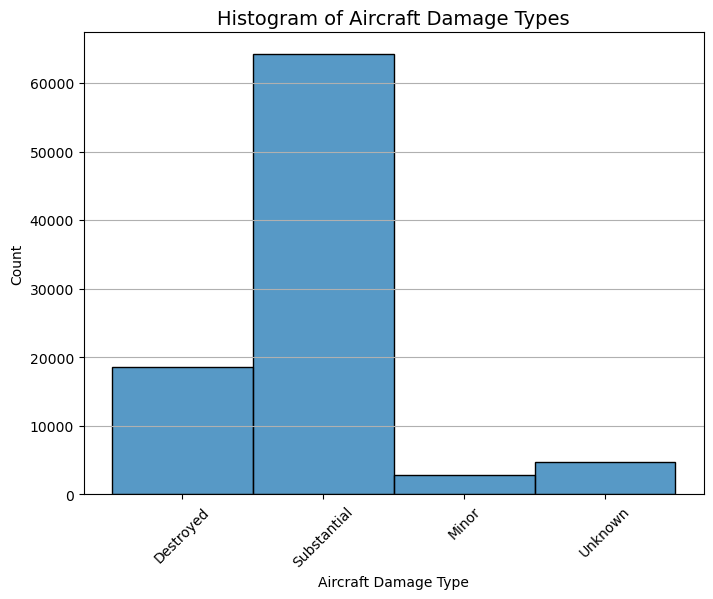

In [35]:
# A Histogram of aircraft damage types against their count
# Histogram of aircraft damage types
plt.figure(figsize=(8, 6))
sns.histplot(data=df_cleaned, x='Aircraft.damage')
plt.title('Histogram of Aircraft Damage Types', fontsize=14)
plt.xlabel('Aircraft Damage Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()

**Results Explanation:**

*Distribution of Damage Types:*

The histogram displays the frequency of each type of aircraft damage. 
A high bar for a particular category means that this type of damage is more frequent in aircraft incidents. Since substantial damage has the highest count, it indicates that this is the most common damage type reported in incidents.

*Safety and Risk Insight:*

If a large number of aircraft incidents result in minor damage, it could suggest that while accidents happen, many are not catastrophic and involve recoverable damage.
Conversely, if substantial damage or destroyed are frequent, it may indicate that the dataset contains numerous high-impact accidents or that certain types of aircraft or operations carry higher risks.

*Key Takeaways:*
This histogram allows you to quickly see which types of damage are most common in the dataset, providing insight into both incident frequency and severity.
The recommended aircrafts to invest in are the minor damaged aircraft types as they deem to be more durable.

#### 3. Risk Analysis
Risk analysis would combine elements from both safety performance and operational efficiency, focusing on accident history and external factors such as weather.



#### Scatter Plot for Risk Assessment: Fatal Injuries vs. Aircraft Damage

This scatter plot visualizes the relationship between **total fatal injuries** and **aircraft damage** in aviation incidents. The size of the points represents the number of **serious injuries**, providing a multidimensional view of risk factors associated with aircraft accidents.


C:\Users\admin\AppData\Local\Temp\ipykernel_25604\2608400534.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  scatter = sns.scatterplot(data=df_cleaned,


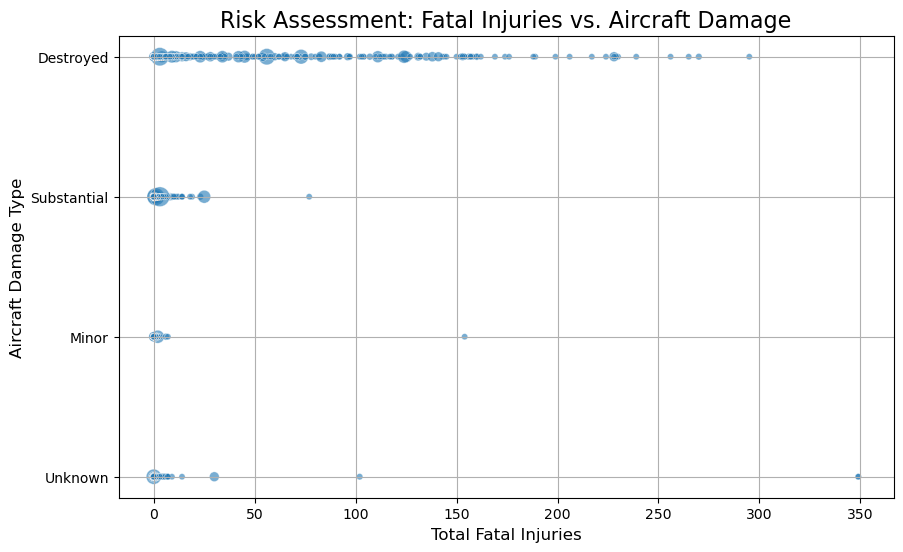

In [39]:

# Scatter plot for risk assessment
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=df_cleaned, 
                          x='Total.Fatal.Injuries', 
                          y='Aircraft.damage', 
                          size='Total.Serious.Injuries', 
                          sizes=(20, 200), 
                          alpha=0.6,
                          palette='viridis',
                          legend=None)  # Disable default legend

# Title and labels
plt.title('Risk Assessment: Fatal Injuries vs. Aircraft Damage', fontsize=16)
plt.xlabel('Total Fatal Injuries', fontsize=12)
plt.ylabel('Aircraft Damage Type', fontsize=12)
plt.grid(True)
plt.show()

*Interpretation of Results:*
This scatter plot provides a comprehensive risk assessment by displaying how different levels of injuries correlate with aircraft damage, which is useful for identifying trends in safety and risk levels.
Points clustered around certain levels of aircraft damage,indicates that fatal accidents are often associated with certain types of damage.
Points with larger sizes also reflect serious injuries, adding an extra dimension of severity to incidents with high fatality counts.